In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, ADASYN

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [3]:
train_df = pd.read_csv("train.csv", header=None, na_values=[" ?"])
test_df = pd.read_csv("test.csv", header=None, na_values=" ?")

In [5]:
columns = [
    "age", "workclass", "fnlwgt", "education",
    "education_num", "marital_status", "occupation", "relationship",
    "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "income"
]

train_df.columns = columns
test_df.columns = columns

test_df["income"] = test_df["income"].str.replace(".", "", regex=False)

df = pd.concat([train_df, test_df])

In [7]:
# Заполняем пропущенные значения самым частым значением(мода)
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

train_df = df.iloc[:len(train_df)]
test_df = df.iloc[len(train_df):]

X_train, y_train = train_df.drop(columns=["income"]), train_df["income"]
X_test, y_test = test_df.drop(columns=["income"]), test_df["income"]

Критерий: gini
Accuracy: 0.8089
Precision: 0.5925
Recall: 0.6113
F1 score: 0.6017


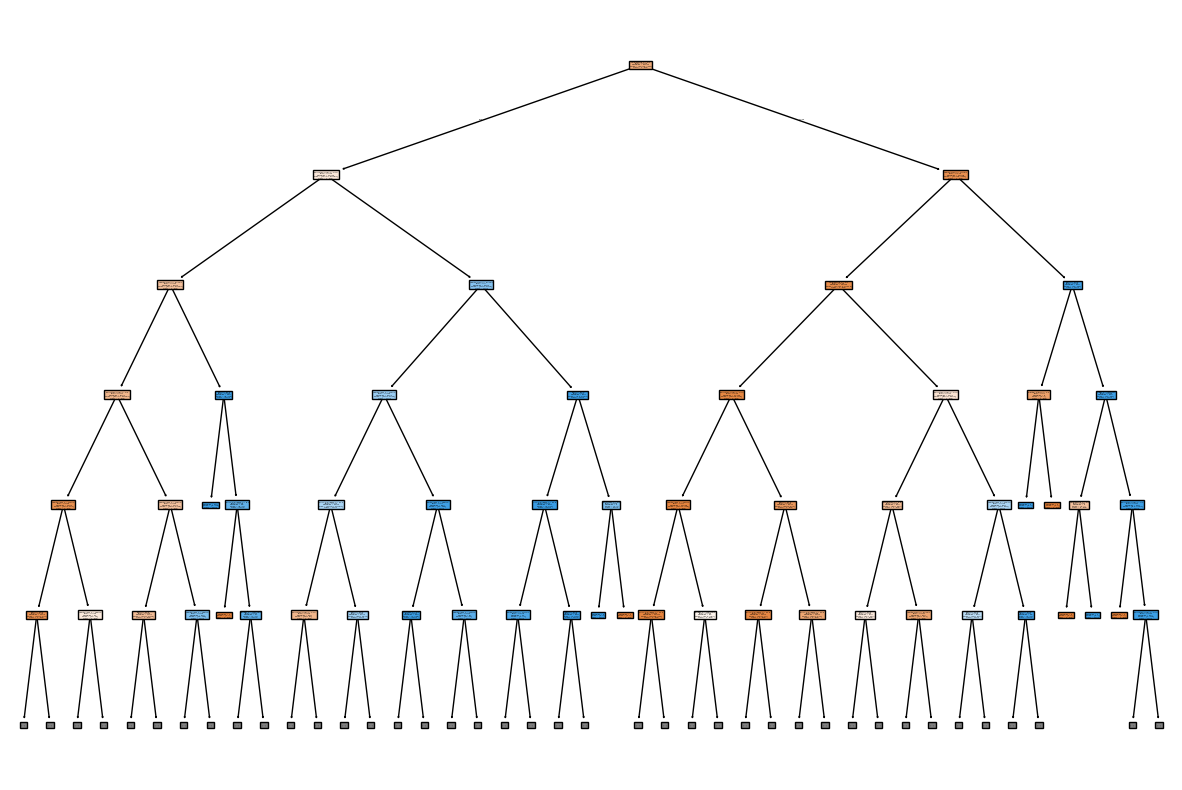

Критерий: entropy
Accuracy: 0.8093
Precision: 0.5962
Recall: 0.5980
F1 score: 0.5971


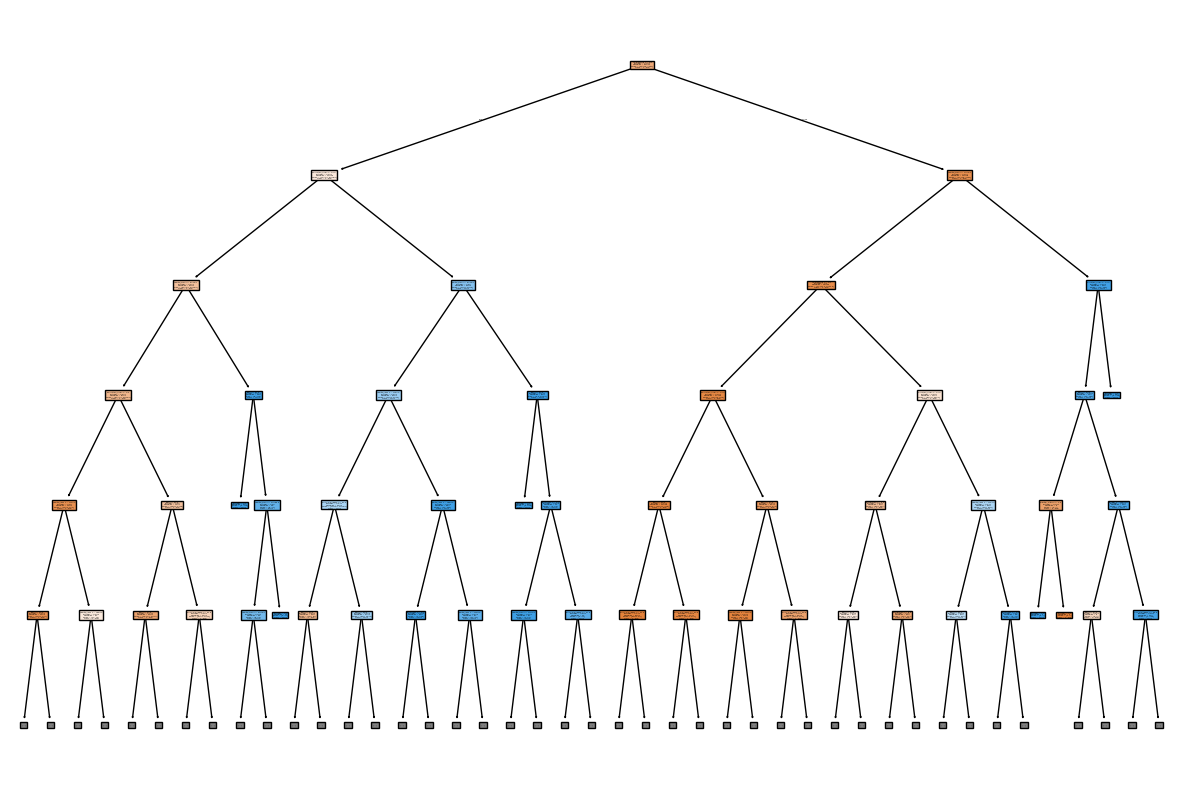

In [9]:
def train_decision_tree(criterion="gini"):
    model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Критерий: {criterion}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 score: {f1:.4f}")

    # Визуализация дерева
    plt.figure(figsize=(15, 10))
    plot_tree(model, feature_names=X_train.columns, class_names=["<=50K", ">50K"], filled=True, max_depth=5)
    plt.show()

for criterion in ["gini", "entropy"]:
    train_decision_tree(criterion)

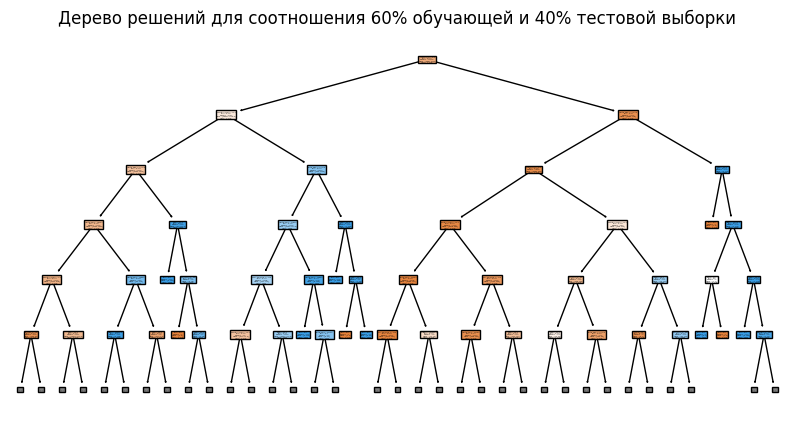

Соотношение 60% обучающей, 40% тестовой выборки:
  Accuracy: 0.8119
  Precision: 0.6050
  Recall: 0.6275
  F1 score: 0.6160
--------------------------------------------------


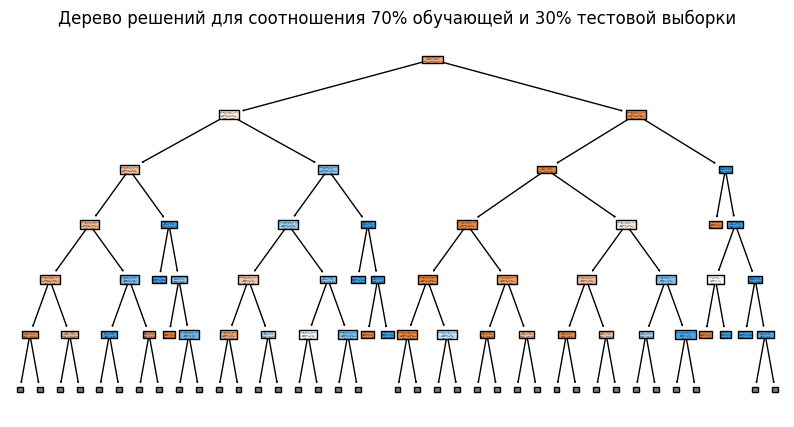

Соотношение 70% обучающей, 30% тестовой выборки:
  Accuracy: 0.8049
  Precision: 0.5909
  Recall: 0.6049
  F1 score: 0.5978
--------------------------------------------------


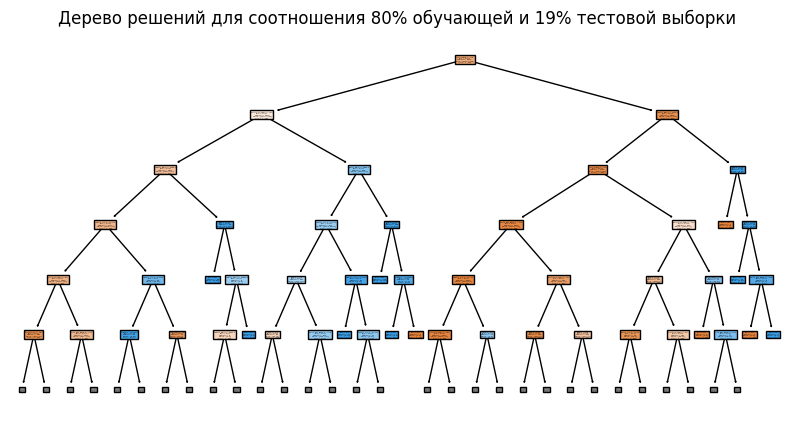

Соотношение 80% обучающей, 19% тестовой выборки:
  Accuracy: 0.8031
  Precision: 0.5899
  Recall: 0.5988
  F1 score: 0.5943
--------------------------------------------------


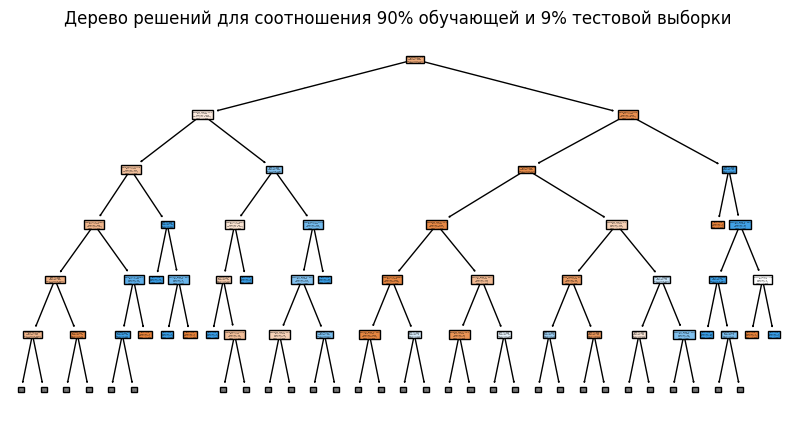

Соотношение 90% обучающей, 9% тестовой выборки:
  Accuracy: 0.8009
  Precision: 0.5848
  Recall: 0.5951
  F1 score: 0.5899
--------------------------------------------------


In [19]:
# эксперименты
ratios = [0.6, 0.7, 0.8, 0.9]
metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": []
}

for ratio in ratios:
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, train_size=1-ratio, random_state=42)

    model = DecisionTreeClassifier(criterion="gini", random_state=42)
    model.fit(X_train_part, y_train_part)

    plt.figure(figsize=(10, 5))
    plot_tree(model, feature_names=X_train.columns, class_names=["<=50K", ">50K"], filled=True, max_depth=5)
    plt.title(f"Дерево решений для соотношения {int(ratio*100)}% обучающей и {int((1-ratio)*100)}% тестовой выборки")
    plt.show()
    
    y_pred = model.predict(X_test_part)

    accuracy = accuracy_score(y_test_part, y_pred)
    precision = precision_score(y_test_part, y_pred)
    recall = recall_score(y_test_part, y_pred)
    f1 = f1_score(y_test_part, y_pred)

    metrics["accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["recall"].append(recall)
    metrics["f1_score"].append(f1)

    print(f"Соотношение {int(ratio*100)}% обучающей, {int((1-ratio)*100)}% тестовой выборки:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 score: {f1:.4f}")
    print("-" * 50)

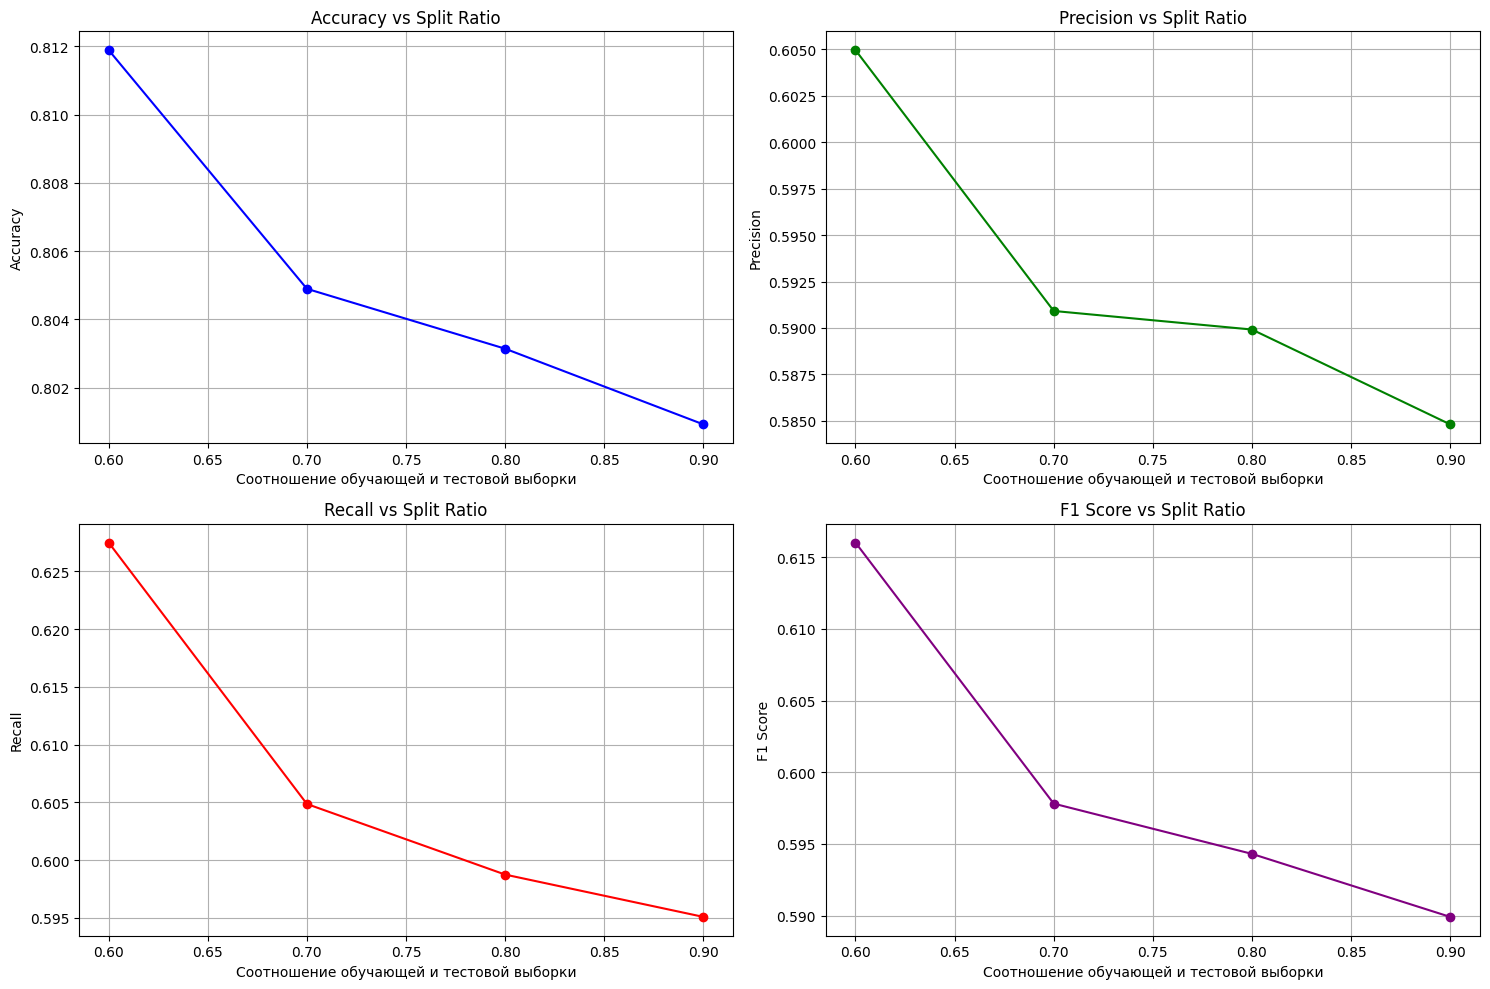

In [13]:
# Визуализация графиков метрик
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
ax[0, 0].plot(ratios, metrics["accuracy"], marker="o", color="b", label="Accuracy")
ax[0, 0].set_title("Accuracy vs Split Ratio")
ax[0, 0].set_xlabel("Соотношение обучающей и тестовой выборки")
ax[0, 0].set_ylabel("Accuracy")
ax[0, 0].grid(True)

# Precision
ax[0, 1].plot(ratios, metrics["precision"], marker="o", color="g", label="Precision")
ax[0, 1].set_title("Precision vs Split Ratio")
ax[0, 1].set_xlabel("Соотношение обучающей и тестовой выборки")
ax[0, 1].set_ylabel("Precision")
ax[0, 1].grid(True)

# Recall
ax[1, 0].plot(ratios, metrics["recall"], marker="o", color="r", label="Recall")
ax[1, 0].set_title("Recall vs Split Ratio")
ax[1, 0].set_xlabel("Соотношение обучающей и тестовой выборки")
ax[1, 0].set_ylabel("Recall")
ax[1, 0].grid(True)

# F1 Score
ax[1, 1].plot(ratios, metrics["f1_score"], marker="o", color="purple", label="F1 Score")
ax[1, 1].set_title("F1 Score vs Split Ratio")
ax[1, 1].set_xlabel("Соотношение обучающей и тестовой выборки")
ax[1, 1].set_ylabel("F1 Score")
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()
